### KNN Classifier

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

from sklearn.datasets import load_wine
dataset = load_wine()
X = dataset["data"]
y = dataset["target"]
feature_names = dataset["feature_names"]

df=pd.DataFrame(X, columns=feature_names)

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.28, random_state=1)
# print(X_test.shape,X_train.shape,X_val.shape,y_test.shape,y_train.shape,y_val.shape)

In [3]:
K=[1,3,5,7]
models = []
preds = pd.DataFrame()
for i in tqdm(K):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    models.append(model)
    
for j in tqdm(range(len(models))):
    preds[j]=models[j].predict(X_val)
  

100%|██████████| 4/4 [00:00<00:00, 403.23it/s]


In [4]:
from sklearn.metrics import accuracy_score

acc=[accuracy_score(y_val,preds[k]) for k in range(len(K))]
print(acc)

[0.7428571428571429, 0.7714285714285715, 0.6857142857142857, 0.6857142857142857]


Automatically created module for IPython interactive environment


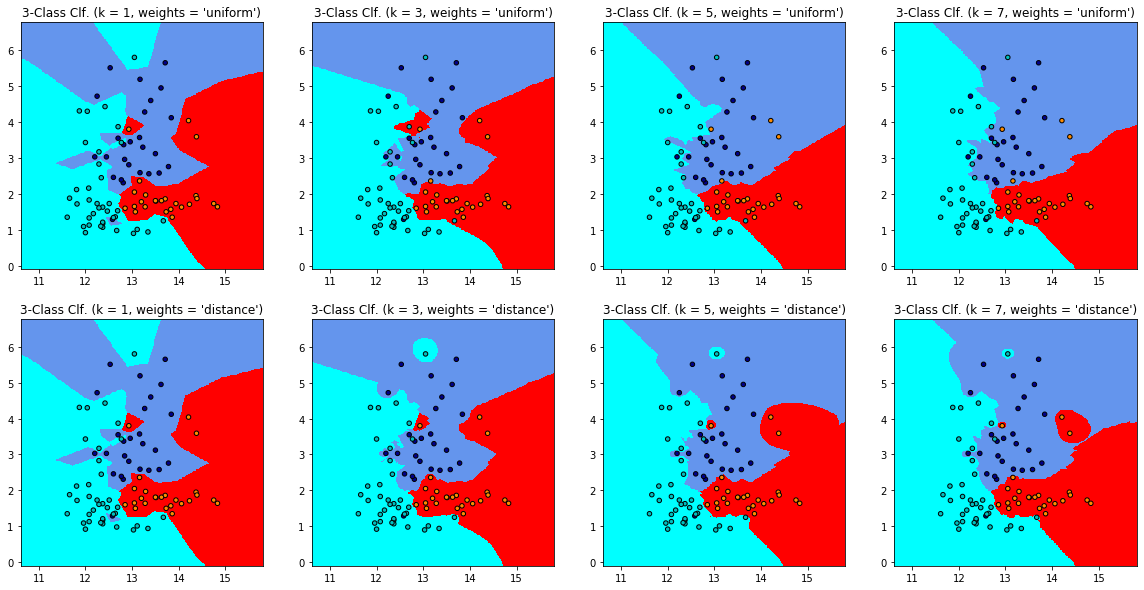

In [5]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# we only take the first two features. We could avoid this ugly slicing by using a two-dim dataset
X = X_train.to_numpy()[:,:2]
y = y_train

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['red', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

#creation of subplots
fig, ax =plt.subplots(2,4,figsize=(20,10))
l=0
for r in K:
    m=0
    for w in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(r, weights=w)
        clf.fit(X, y)

        # Plot the decision boundary. For that, we will assign a color to each point in 
        #the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        
        ax[m,l].set_title("3-Class Clf. (k = %i, weights = '%s')"  % (r, w))
        
        ax[m,l].pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points
        ax[m,l].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                    edgecolor='k', s=20)
#         ax[m,l].xlim(xx.min(), xx.max())
#         ax[m,l].ylim(yy.min(), yy.max())
        
      
        m=m+1
    l=l+1
plt.savefig('1.png')
plt.show()


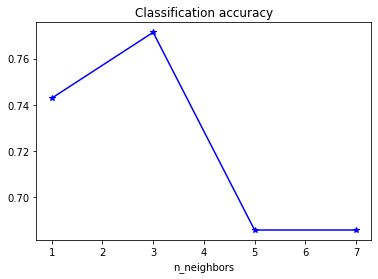

In [6]:
plt.plot(K,acc,c='blue',linestyle='-',marker='*')
plt.title('Classification accuracy')
plt.xlabel('n_neighbors')
plt.savefig('2.png')
plt.show()


### Linear SVM Classification

In [7]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

C=[0.001,0.01,0.1,1,10,100,1000]

#data must become Standardize with mean=0 var=1 for this Approach (to avoid not converging)
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s=scaler.transform(X_train)
X_val_s=scaler.transform(X_val)
X_test_s=scaler.transform(X_test)


models = []
preds = pd.DataFrame()
for i in C:
    print(i)
    model = LinearSVC(C=i, max_iter=100000)
    model.fit(X_train_s, y_train)
    models.append(model)
    
for j in range(len(models)):
    preds[j]=models[j].predict(X_val_s)
  

0.001
0.01
0.1
1
10
100
1000


In [8]:
from sklearn.metrics import accuracy_score

acc=[accuracy_score(y_val,preds[k]) for k in range(len(C))]
print(acc)

[0.9428571428571428, 0.9714285714285714, 0.9714285714285714, 0.9142857142857143, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428]


Automatically created module for IPython interactive environment
0.001
0.01
0.1
1
10
100


C:\Users\hadin\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


1000


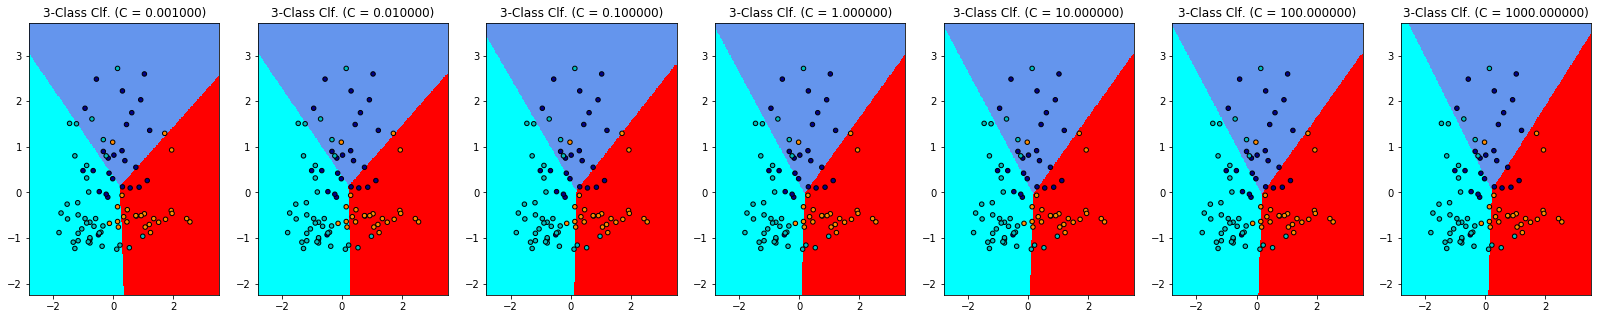

In [9]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# we only take the first two features. We could avoid this ugly slicing by using a two-dim dataset
X = X_train_s[:,:2]
y = y_train

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['red', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

#creation of subplots
fig, ax =plt.subplots(1,7,figsize=(28,5))
l=0
for r in C:
    
 # we create an instance of SVC
    clf = LinearSVC(C=r, max_iter=100000)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each point in 
    #the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    print(r)
     # Put the result into a color plot
    Z = Z.reshape(xx.shape)
        
    ax[l].set_title("3-Class Clf. (C = %f)" % r)
        
    ax[l].pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points
    ax[l].scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                    edgecolor='k', s=20)
        
      
    l=l+1
plt.savefig('3.png')
plt.show()


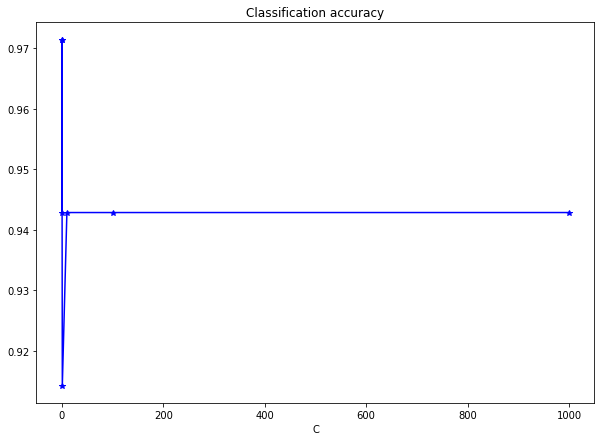

In [10]:
plt.figure(figsize=(10, 7))
plt.plot(C,acc,c='blue',linestyle='-',marker='*')
plt.title('Classification accuracy')
plt.xlabel('C')

plt.savefig('4.png')
plt.show()

### SVC with RBF Kernel

In [11]:
from sklearn.svm import SVC

models = []
preds = pd.DataFrame()
for i in C:
#     print(i)
    model = SVC(kernel='rbf', random_state=0, gamma=.01, C=i)
    model.fit(X_train_s, y_train)
    models.append(model)
    
for j in range(len(models)):
    preds[j]=models[j].predict(X_val_s)

In [12]:
from sklearn.metrics import accuracy_score

acc=[accuracy_score(y_val,preds[k]) for k in range(len(C))]
print(acc)

[0.4, 0.4, 0.4, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428, 0.9428571428571428]


#### Cross-Validation & GridSearch

In [13]:
from sklearn.model_selection import GridSearchCV

#Merge training and Validation set
X_merg=pd.concat([X_train,X_val])
y_merg=np.concatenate((y_train,y_val),axis=0)

#now standardize the merged data
scaler = StandardScaler()
scaler.fit(X_merg)
X_merg_s=scaler.transform(X_merg)
X_test_s=scaler.transform(X_test)

C_range = np.logspace(-2, 3, 13)
gamma_range = np.logspace(-5, 1, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
grid = GridSearchCV(SVC(kernel='rbf', random_state=0), param_grid=param_grid, cv=5, scoring='accuracy')
grid.fit(X_merg_s, y_merg)

print("The best parameters are %s with a score of %0.3f"
      % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 1.2115276586285888, 'gamma': 0.0031622776601683794} with a score of 0.975


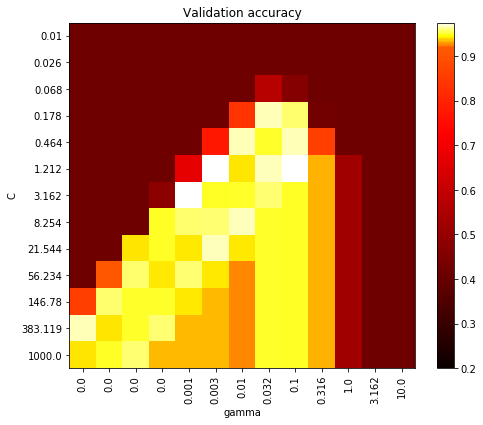

In [14]:
# Plot Heatmap for C & Gamma

from matplotlib.colors import Normalize

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
    
    

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))
    
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), np.around(gamma_range,3), rotation=90)
plt.yticks(np.arange(len(C_range)), np.around(C_range,3))
plt.title('Validation accuracy')
plt.savefig('5.png')
plt.show()


Automatically created module for IPython interactive environment


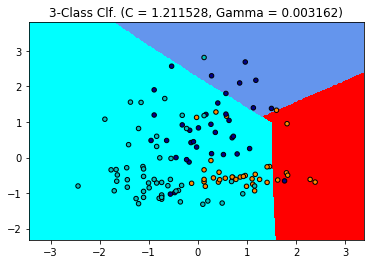

In [15]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

# we only take the first two features. We could avoid this ugly slicing by using a two-dim dataset
X = X_merg_s[:,:2]
y = y_merg

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['red', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

C_best=grid.best_params_['C']
gamma_best=grid.best_params_['gamma']
    
 # we create an instance of SVC
clf = SVC(kernel='rbf', random_state=0, gamma=gamma_best, C=C_best)
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each point in 
#the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
     # Put the result into a color plot
Z = Z.reshape(xx.shape)
        
plt.title("3-Class Clf. (C = %f, Gamma = %f)"  % (C_best, gamma_best))
        
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                    edgecolor='k', s=20)
        
plt.savefig('6.png')
plt.show()
